#  Customer Churn Prediction

## 1. Project Overview & Introduction

### 🔹 Problem Statement / Motivation:  
Customer churn (i.e., the rate at which customers discontinue their service or product) poses a significant and persistent challenge for telecommunication companies. In a highly competitive market saturated with numerous service providers, customer acquisition costs are often substantially higher than customer retention costs. A high churn rate directly translates to:

Significant Revenue Loss: Each churned customer represents lost recurring revenue, impacting the company's financial stability and growth projections.

Reduced Customer Lifetime Value (CLTV): Churn diminishes the average CLTV, as customers are not retained long enough to realize their full revenue potential.

Increased Marketing & Acquisition Costs: To offset churn, companies are forced to invest more heavily in acquiring new customers, which can be an inefficient use of resources if underlying retention issues are not addressed.

Brand Erosion & Negative Word-of-Mouth: Dissatisfied or disengaged customers who churn may spread negative sentiments, damaging the company's reputation and deterring potential new customers.

Traditional reactive approaches to churn, such as exit surveys or last-ditch efforts, are often insufficient as they occur after the customer has already decided to leave. There is a critical need for a proactive and data-driven approach to identify customers at high risk of churning before they actually do.

This project aims to address this problem by leveraging historical customer data to develop a robust machine learning model capable of accurately predicting which customers are likely to churn. By identifying these "at-risk" customers early, the telecom company can implement targeted retention strategies, such as personalized offers, proactive customer support, or service adjustments, thereby mitigating revenue loss, enhancing customer satisfaction, and improving overall business profitability.

### 🔹 Dataset Description:
The dataset contains 3,738 customer records from a telecom provider. It includes customer demographics, service details, account information, and a target column `Churn`.

- Total Rows: 3,738  
- Features: 21  
- Target: `Churn` (Yes/No)

### 🔹 Goals / Objectives:
- Explore customer behavior and churn patterns  
- Build a model to predict churn  
- Identify key drivers of churn  
- Suggest actionable business recommendations

### 🔹 Technologies Used:
- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.  Exploratory Data Analysis (EDA) Insights

In this section, we explore the dataset to uncover key patterns, clean anomalies, and prepare the data for modeling.


In [72]:
df = pd.read_excel(r'Customer Churn.xlsx')

In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4495-LHSSK,Female,No,No,Yes,18,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,No
1,5791-KAJFD,Female,No,Yes,Yes,56,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),68.75,3808.00,No
2,3721-CNZHX,Male,No,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,304.60,No
3,4000-VGMQP,Male,No,Yes,Yes,38,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.95,2862.55,No
4,2194-IIQOF,Female,No,Yes,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.30,6388.65,No


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3738 non-null   object 
 1   gender            3738 non-null   object 
 2   SeniorCitizen     3738 non-null   object 
 3   Partner           3738 non-null   object 
 4   Dependents        3738 non-null   object 
 5   tenure            3738 non-null   int64  
 6   PhoneService      3738 non-null   object 
 7   MultipleLines     3738 non-null   object 
 8   InternetService   3738 non-null   object 
 9   OnlineSecurity    3738 non-null   object 
 10  OnlineBackup      3738 non-null   object 
 11  DeviceProtection  3738 non-null   object 
 12  TechSupport       3738 non-null   object 
 13  StreamingTV       3738 non-null   object 
 14  StreamingMovies   3738 non-null   object 
 15  Contract          3738 non-null   object 
 16  PaperlessBilling  3738 non-null   object 


In [75]:
df.drop('customerID',axis=1,inplace=True)

In [76]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,3733.000000,3733.000000,3733.000000
mean,27.935441,67.844133,2054.323239
std,24.125728,28.945812,2193.355619
min,1.000000,18.400000,18.850000
25%,5.000000,45.300000,273.000000
50%,21.000000,74.750000,1151.550000
75%,49.000000,90.650000,3361.050000
max,72.000000,118.750000,8684.800000


In [79]:
import seaborn as sns

gender


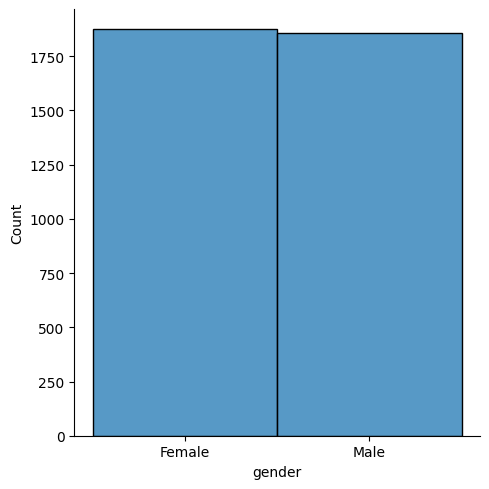

SeniorCitizen


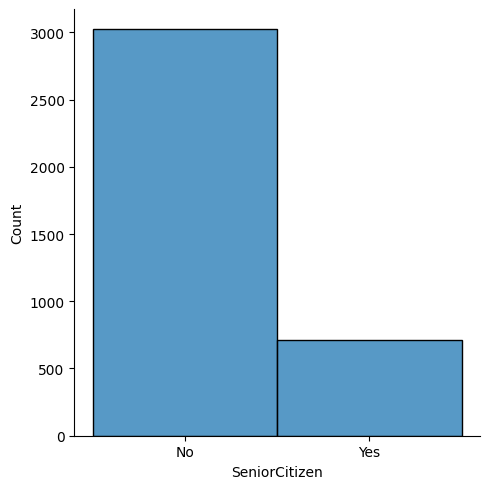

Partner


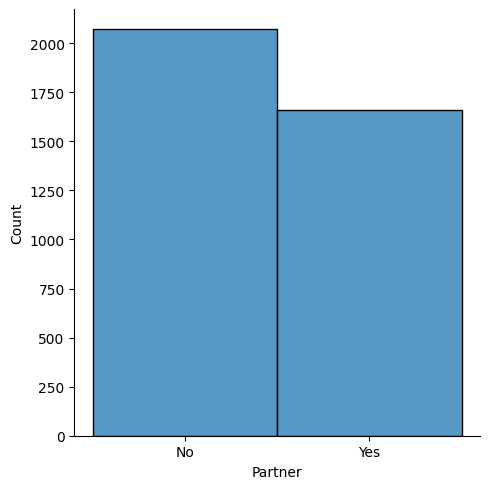

Dependents


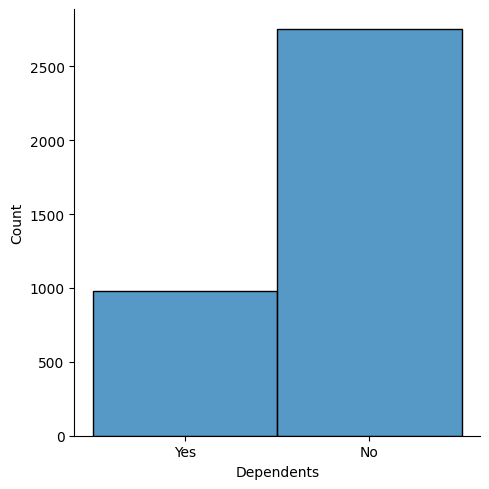

tenure


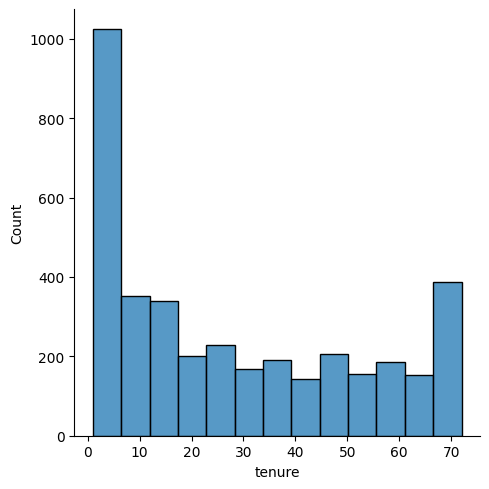

PhoneService


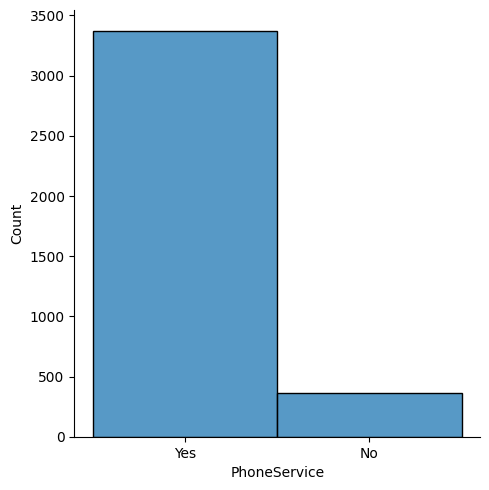

MultipleLines


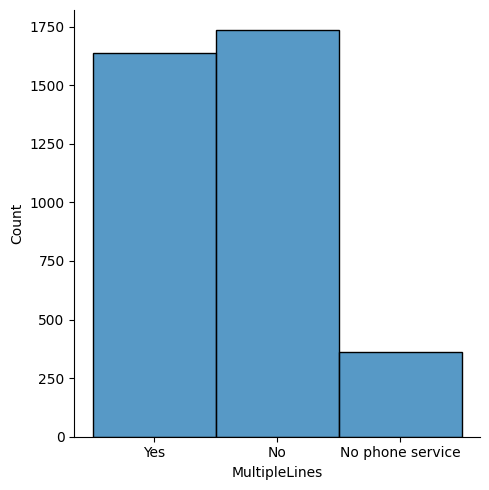

InternetService


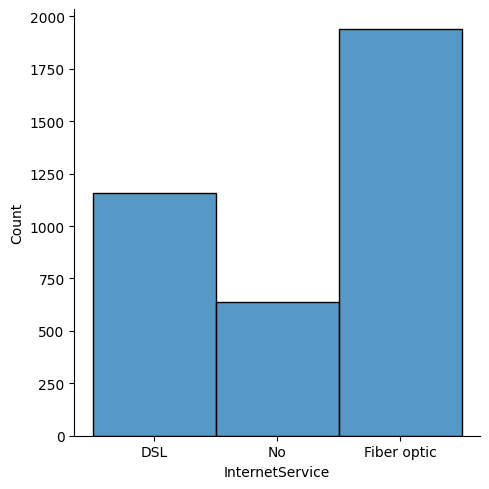

OnlineSecurity


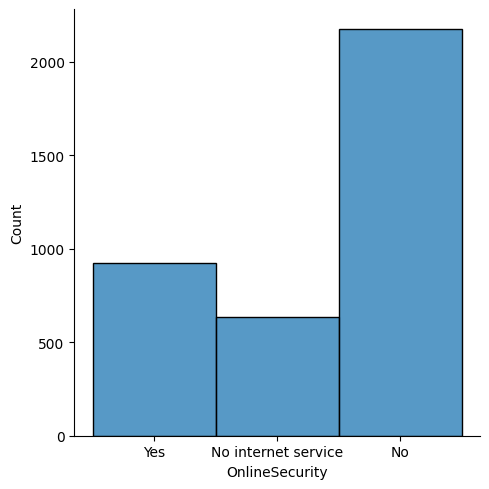

OnlineBackup


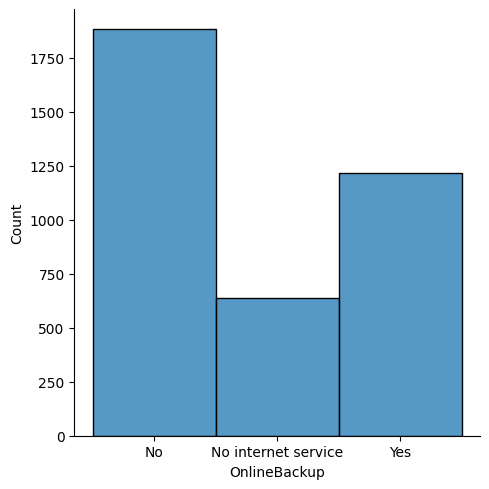

DeviceProtection


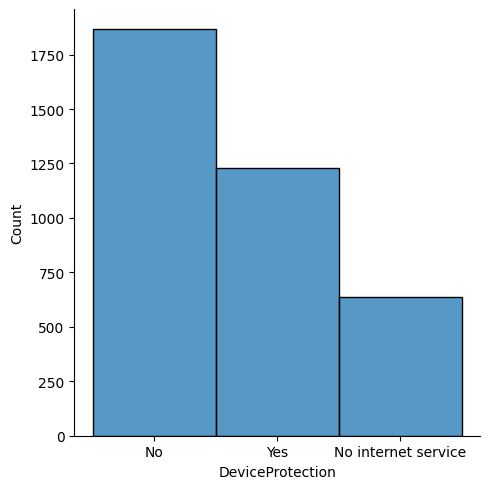

TechSupport


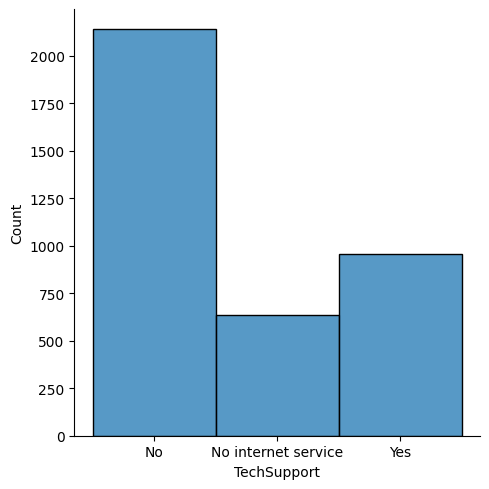

StreamingTV


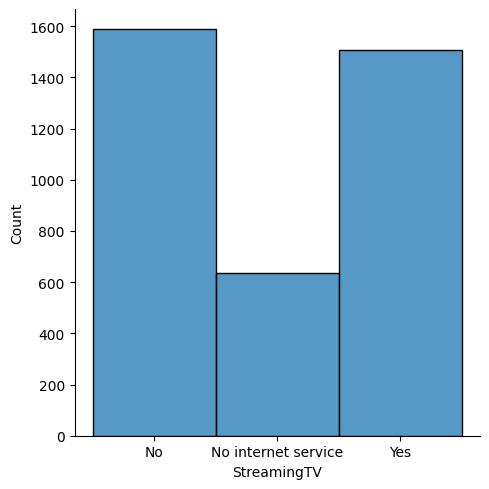

StreamingMovies


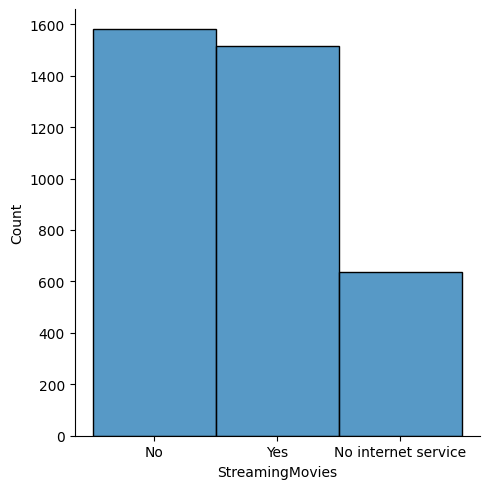

Contract


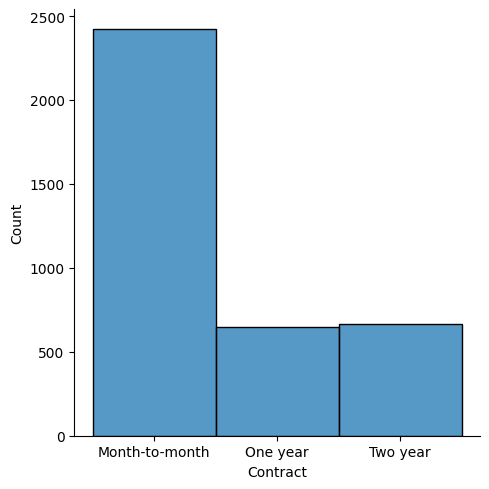

PaperlessBilling


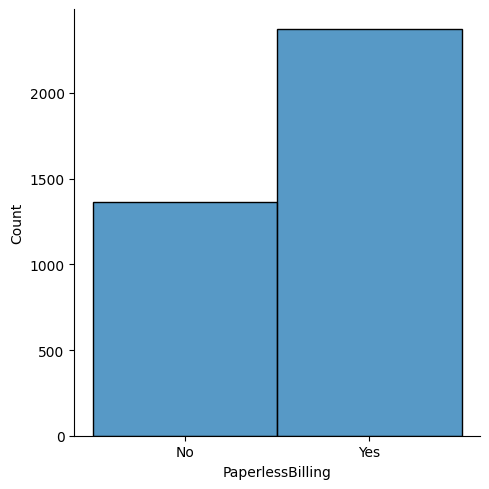

PaymentMethod


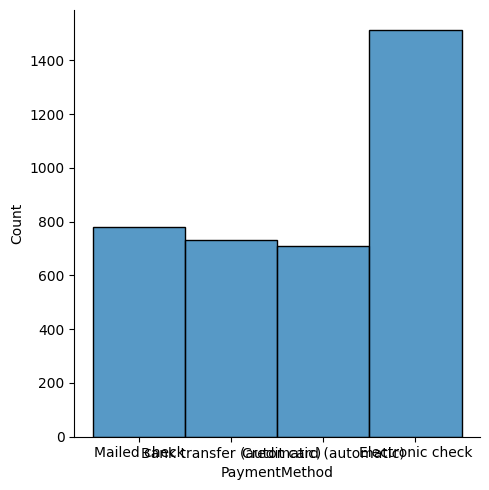

MonthlyCharges


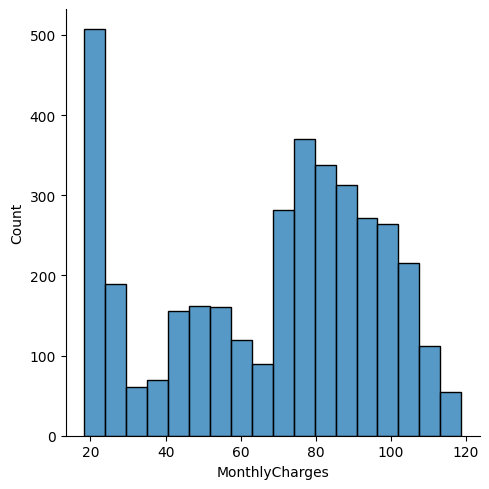

TotalCharges


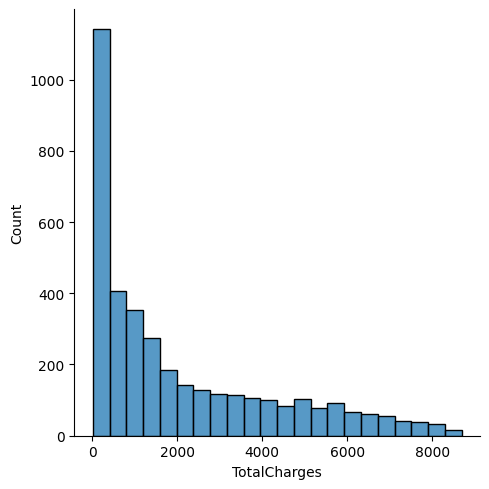

Churn


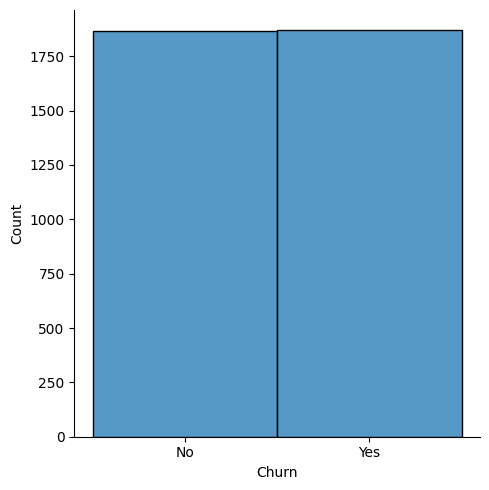

In [80]:
for col_name in df.columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

## Exploratory Data Analysis (EDA) Insights  
Through Exploratory Data Analysis, we uncovered critical patterns influencing customer churn:

Data Preprocessing: Handled 5 missing values in TotalCharges by dropping rows. The Churn target variable is well-balanced.

Demographics: Senior citizens, and customers without partners or dependents, show higher churn rates. Gender does not appear to be a significant factor.

Tenure & Contract: New customers (low tenure) and those on month-to-month contracts exhibit significantly higher churn. Long-term contracts are strong retention factors.

Services & Charges:

Customers lacking value-added services (e.g., Online Security, Tech Support) are more prone to churn.

Fiber optic internet users have a higher churn rate.

Higher MonthlyCharges and Electronic Check payment methods correlate with increased churn.


In [81]:
def tenure_creation(data):
    if data < 12:
        return "Below 1 year"
    elif data < 36:
        return "Below3 years"
    elif data < 60:
        return "Below 5 years"
    else:
        return "oldest Customers"

df["tenure group"] = df["tenure"].apply(tenure_creation)
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure group
0,Female,No,No,Yes,18,Yes,Yes,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,No,Below3 years
1,Female,No,Yes,Yes,56,Yes,Yes,DSL,Yes,No,...,No,No,Yes,One year,Yes,Bank transfer (automatic),68.75,3808.00,No,Below 5 years
2,Male,No,No,No,15,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,304.60,No,Below3 years
3,Male,No,Yes,Yes,38,Yes,Yes,DSL,No,Yes,...,No,Yes,Yes,One year,No,Credit card (automatic),78.95,2862.55,No,Below 5 years
4,Female,No,Yes,No,71,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.30,6388.65,No,oldest Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,Male,No,Yes,Yes,72,Yes,No,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),68.40,4855.35,No,oldest Customers
3734,Female,Yes,Yes,No,36,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),91.95,3301.05,No,Below 5 years
3735,Male,No,No,No,26,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No,Below3 years
3736,Male,Yes,No,No,43,Yes,No,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.55,3856.75,Yes,Below 5 years


In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_name in df.columns:
    df[col_name] = le.fit_transform(df[col_name])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure group
0,0,0,0,1,17,1,2,0,2,0,...,0,0,0,0,0,3,402,1508,0,2
1,0,0,1,1,55,1,2,0,2,0,...,0,0,2,1,1,0,532,2693,0,1
2,1,0,0,0,14,1,0,2,1,1,...,1,1,1,1,0,3,23,785,0,2
3,1,0,1,1,37,1,2,0,0,2,...,0,2,2,1,0,1,698,2419,0,1
4,0,0,1,0,70,1,2,0,2,2,...,2,2,2,2,0,1,873,3266,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,1,1,71,1,0,0,2,2,...,2,2,0,2,0,0,527,2943,0,3
3734,0,1,1,0,35,1,2,1,0,2,...,0,2,0,0,1,1,922,2552,0,1
3735,1,0,0,0,25,1,0,2,1,1,...,1,1,1,1,0,1,23,999,0,2
3736,1,1,0,0,42,1,0,1,0,0,...,0,2,2,0,1,3,878,2706,1,1


In [83]:
# Splitting the dataset in X and Y

X = df.drop('Churn',axis=1)
Y = df['Churn']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100, stratify = Y)

In [85]:
# feature Scaling:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [87]:
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [88]:
Y_pred = lr.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       373
           1       0.76      0.81      0.78       374

    accuracy                           0.78       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.78      0.78      0.78       747



In [90]:
df["Churn"].value_counts()

Churn
1    1869
0    1864
Name: count, dtype: int64

## Feature Selection :

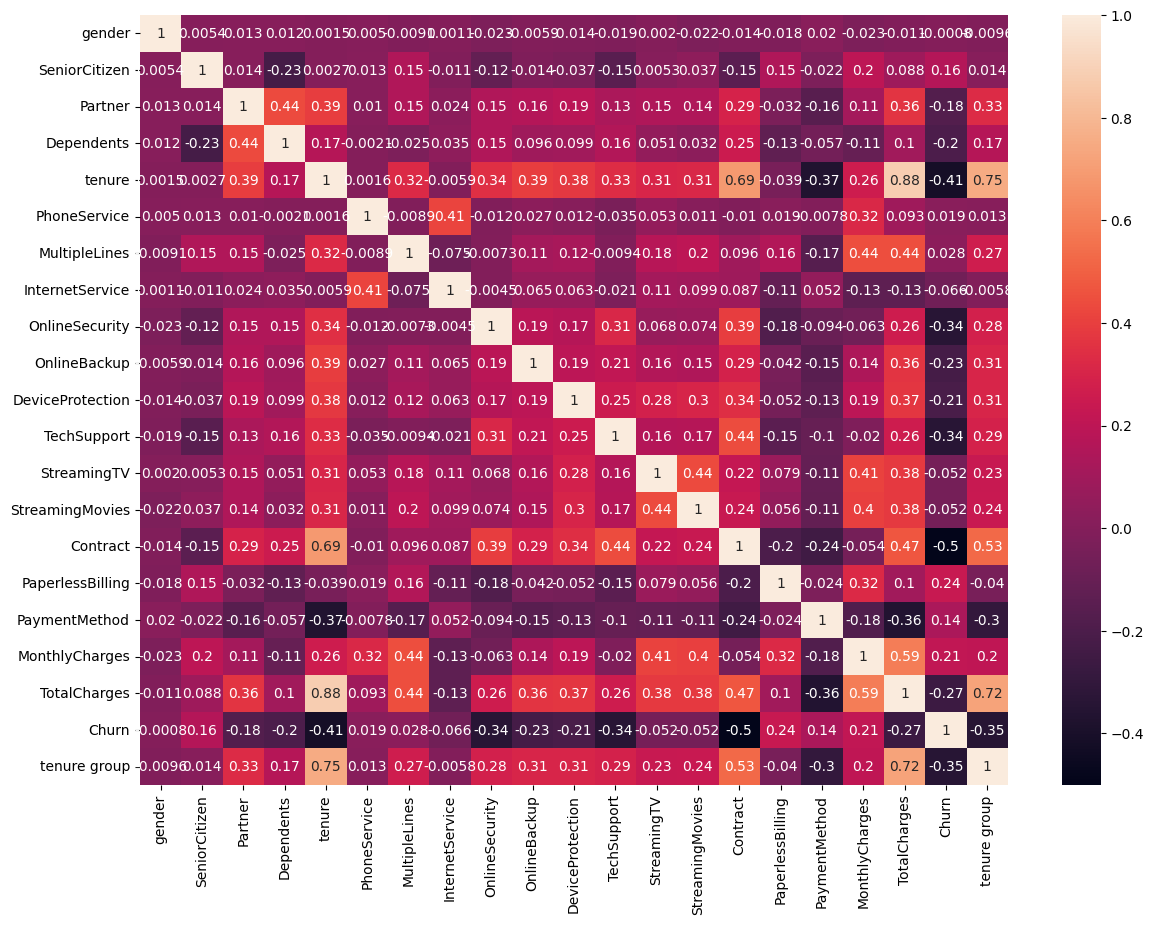

In [91]:
# Getting more to know using heatmap

import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [92]:
# Variance Inflation Factor

# %pip install statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.round(1)

,VIF Factor,Features
0,1.9,gender
1,1.4,SeniorCitizen
2,2.6,Partner
3,1.9,Dependents
4,28.8,tenure
5,12.4,PhoneService
6,2.8,MultipleLines
7,4.3,InternetService
8,2.0,OnlineSecurity
9,2.2,OnlineBackup


In [93]:
df.drop('tenure',axis=1,inplace=True)   # Droping it because we already did it in tenure group and it's showing hight correlation


## XGBoost Model:

In [94]:
# Building XGBoost Model step by step:

# %pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.01)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

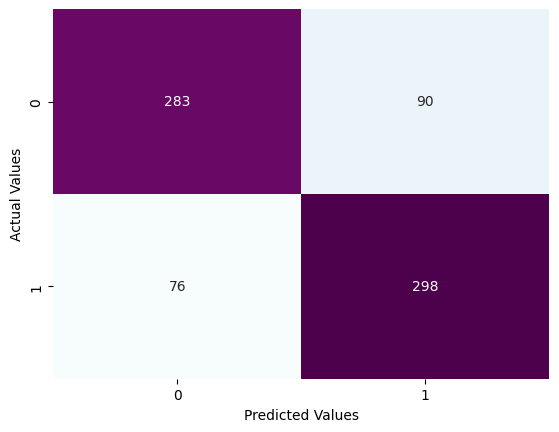

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       373
           1       0.77      0.80      0.78       374

    accuracy                           0.78       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.78      0.78      0.78       747

Accuracy of the model:  0.7777777777777778


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Parameter Search:

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'n_estimators': [50, 100, 200,555,2000,2324,4545,9000],
    'learning_rate': [0.01, 0.1,0.5,0.8]
}


xg_boost = XGBClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=10),  # Base estimator
    random_state=10
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_boost,
    param_grid=param_grid,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)


Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best score: 0.7628958616942013


c:\Users\anxaa\anaconda3\envs\PGA35_2\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [97]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 555, 2000, 2324, 4545, 9000],
    'learning_rate': [0.01, 0.1, 0.5, 0.8]
}

# Initialize XGBClassifier without invalid parameters
xg_boost = XGBClassifier(
    random_state=10,
    eval_metric='logloss'          # Recommended to suppress warning
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_boost,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Output best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use best estimator to predict on test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)


Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best score: 0.7628958616942013


### Cross Validation:

In [98]:
# Cross Validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xg_boost, X_train, Y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.74916388 0.75041876 0.74204355 0.7520938  0.74204355]
Mean accuracy: 0.7471527089180573


### Final Model:

In [99]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.01)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

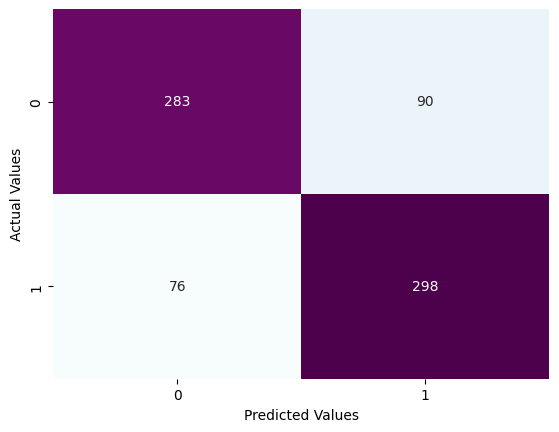

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       373
           1       0.77      0.80      0.78       374

    accuracy                           0.78       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.78      0.78      0.78       747

Accuracy of the model:  0.7777777777777778


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## RFM Customer Segmentation:

In [ ]:
# RFM Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_excel(r'Customer Churn.xlsx')
df.drop('customerID',axis=1,inplace=True)
df.head()


## Key Insights from Customer Churn Prediction Model:

This project focused on developing a predictive model to identify customers at high risk of churn, a critical challenge for telecommunication companies. The insights derived from the model's performance are crucial for strategic customer retention.

- **Model Accuracy**: The predictive model achieved an overall accuracy of **77.78%**, indicating its general effectiveness in classifying customers as either likely to churn or not.
- **Non-Churner Identification (Class 0)**:
    - **Precision of 0.79**: When the model predicts a customer will **not** churn, it is correct 79% of the time. This highlights the model's reliability in identifying stable customers.
    - **Recall of 0.76**: The model successfully identifies 76% of all actual non-churning customers.
- **Churner Identification (Class 1)**:
    - **Precision of 0.77**: When the model predicts a customer **will** churn, it is correct 77% of the time. This indicates a good level of confidence in the model's positive predictions for churn.
    - **Recall of 0.80**: The model is particularly effective at capturing churning customers, identifying 80% of all actual churners. This high recall for the churn class is vital as it minimizes the number of actual churners missed, allowing for timely intervention.
- **Balanced Performance**: With F1-scores of 0.77 for non-churners and 0.78 for churners, the model demonstrates a balanced ability to predict both classes, signifying its robustness in handling the classification task.
- **Data Foundation**: The initial data preparation steps, including handling missing 'TotalCharges' values and cleaning the dataset to 3,733 records, laid a solid groundwork for reliable model training.

---

## Final Conclusion :

The Customer Churn Prediction model has been successfully developed and evaluated, demonstrating a strong capability to predict customer churn with **an accuracy of nearly 78%**. Its particularly notable **recall of 0.80 for churning customers** provides a powerful tool for telecommunication companies, enabling them to proactively identify the vast majority of customers at risk of discontinuing service.

This predictive power offers a robust foundation for **targeted intervention strategies**. By leveraging these insights, companies can deploy personalized retention campaigns, offer timely incentives, and optimize resource allocation towards at-risk segments, thereby significantly reducing churn rates. This data-driven approach is instrumental in enhancing customer lifetime value, minimizing revenue loss, and fostering sustainable business growth in a competitive market. Moving forward, integrating these predictions into a continuous monitoring system and identifying specific churn drivers would further solidify the strategic impact of this project.
